In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

ModuleNotFoundError: No module named 'matplotlib'

Read all files

In [ ]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("*.cali"))

View Calltree

In [ ]:
# Convert 'num_procs' and 'input_size' from metadata to performance data
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")

# Reindex the dataframe for better organization
tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()

Group Performance data by `matrix_size` in the Thicket metadata table.

In [ ]:
# Define common variables
processes = sorted(tk.metadata["num_procs"].unique())

In [ ]:
# Using implementation of plot_pandas from example
def plot_pandas(df, title, xlabel, ylabel):
    processes = sorted(tk.metadata["num_procs"].unique())

    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7)
    )
    
    # Modifies x-axis to use custom tick marks
    plot.set_xticks(processes)
    plot.set_xticklabels(processes)
    
    return plot

In [ ]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

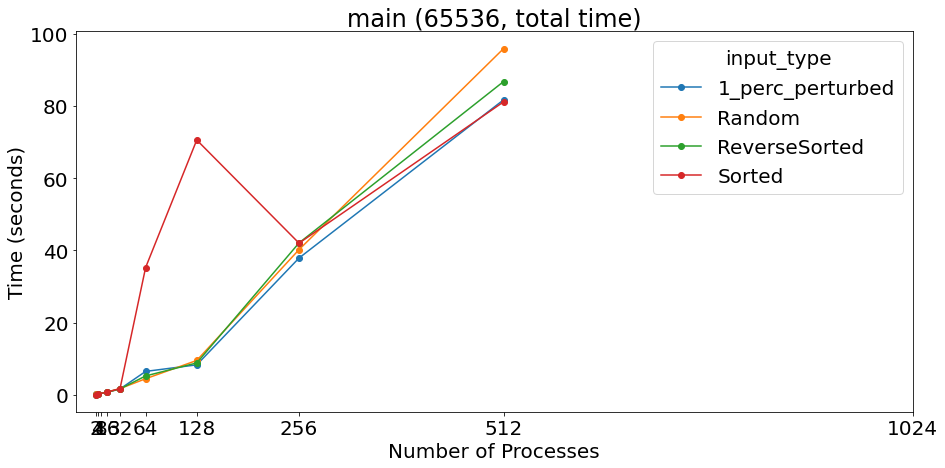

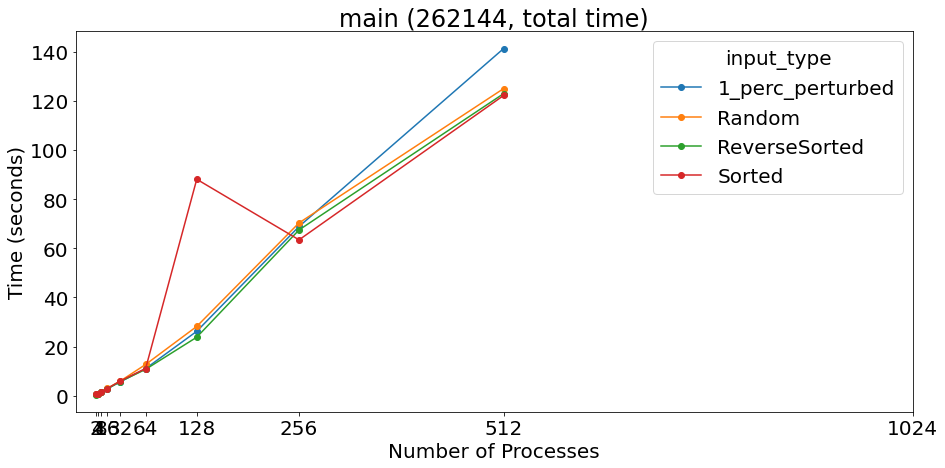

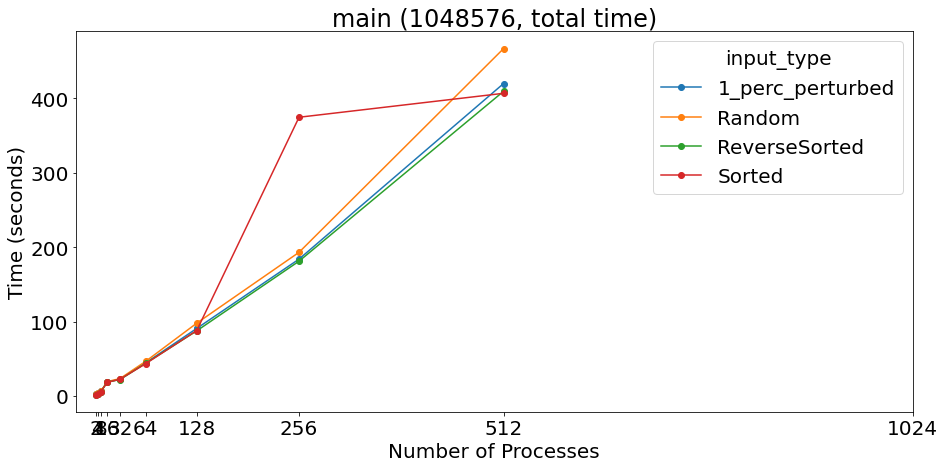

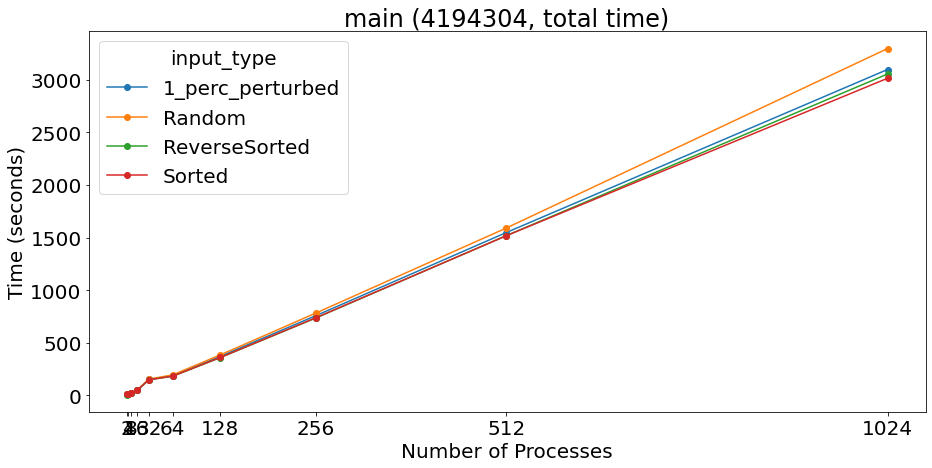

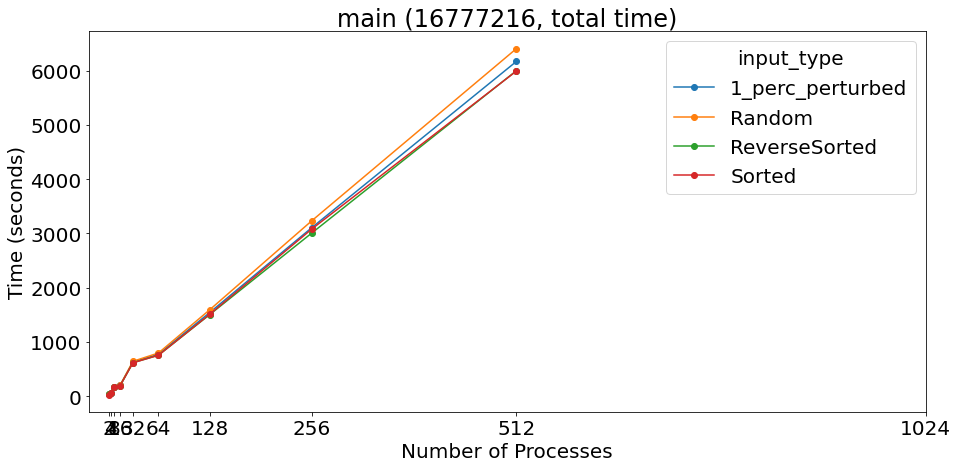

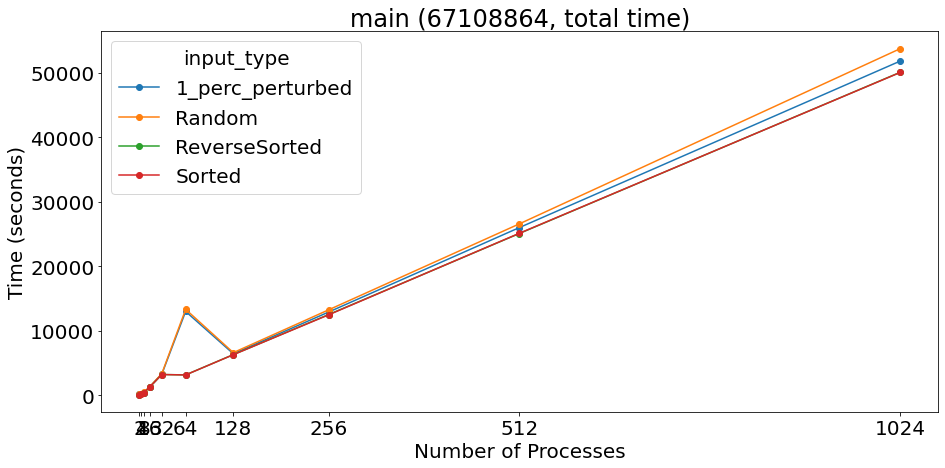

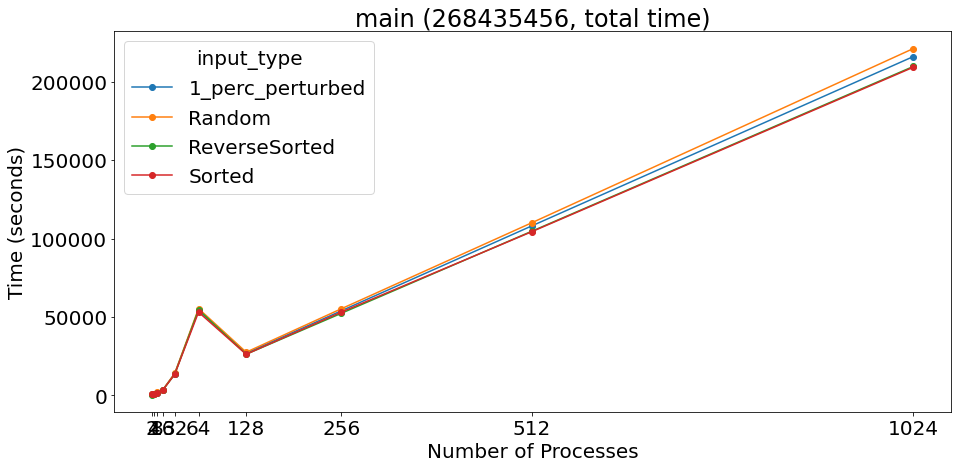

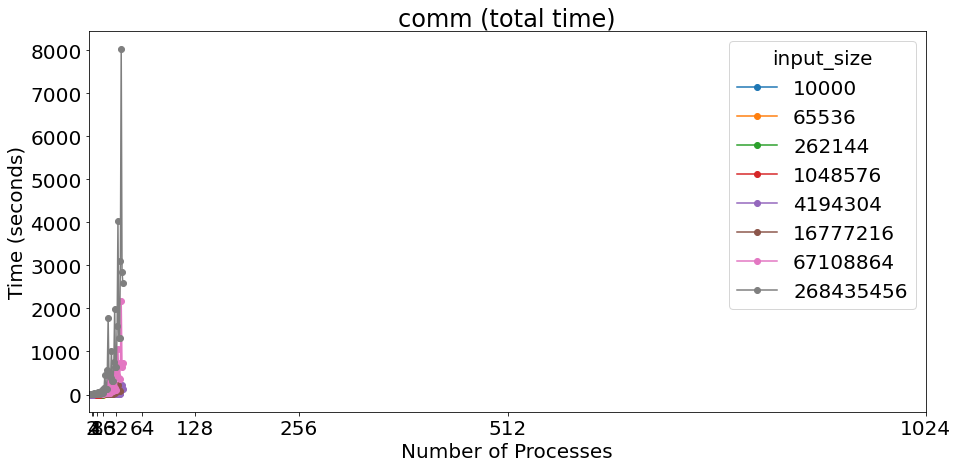

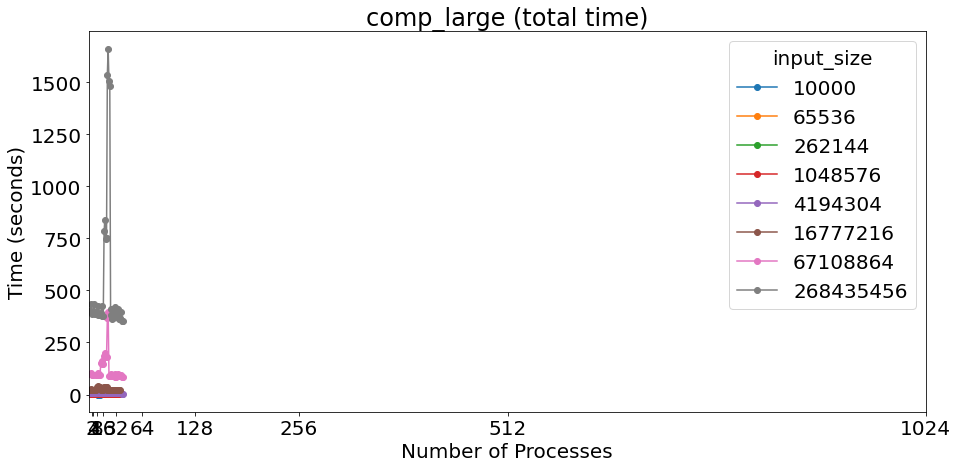

In [34]:
input_sizes = [65536,262144,1048576,4194304,16777216,67108864,268435456]
input_types = ['sorted', 'random', 'reverse', '1_perc_perturbed']

for input_size in input_sizes:
    plt.figure(figsize=(12, 8))

    for input_type in input_types:
        try:
            # Extract data for the input type and input size
            main_df = tk.dataframe.xs(input_size, level='input_size').xs(input_type, level='input_type').reset_index()
            main_avg_df = main_df[['num_procs', 'Avg time/rank']].drop_duplicates(subset='num_procs').set_index('num_procs')

            # Plot the average time for main function
            plt.plot(main_avg_df.index, main_avg_df['Avg time/rank'], label=f'Avg time/rank ({input_type})', linestyle='-')

        except KeyError:
            print(f"Data for input type '{input_type}' and input size '{input_size}' not found.")

    plt.xlabel('Number of Processors')
    plt.ylabel('Time (seconds)')
    plt.title(f'Main Function Average Runtime for input size {input_size} across input types')
    plt.legend()
    plt.grid(True)
    plt.show()